<a href="https://colab.research.google.com/github/Shruti-Rani/LGMVIP-DataScience/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
data=pd.read_csv(r'/content/sample_data/stock_market (MConverter.eu).csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,7/27/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,7/26/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,7/23/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,7/22/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,7/21/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
df.shape

(2035, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 143.1 KB


In [10]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [12]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


data cleaning

In [13]:
missing_values_count=df.isnull().sum()
total_cells=np.product(df.shape)
total_missing=missing_values_count.sum()
percentage_missing=(total_missing/total_cells)*100
print(percentage_missing)

0.0


In [14]:
NAN=[(c, df[c].isnull().mean()*100)for c in df]
NAN=pd.DataFrame(NAN, columns=['columns_name','percentage'])
NAN

,columns_name,percentage
0,index,0.0
1,Date,0.0
2,Open,0.0
3,High,0.0
4,Low,0.0
5,Last,0.0
6,Close,0.0
7,Total Trade Quantity,0.0
8,Turnover (Lacs),0.0


Data Visualisation

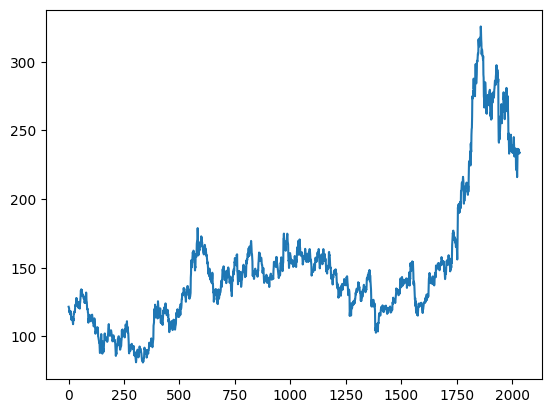

In [15]:
plt.plot(df['Close'])

<Axes: >

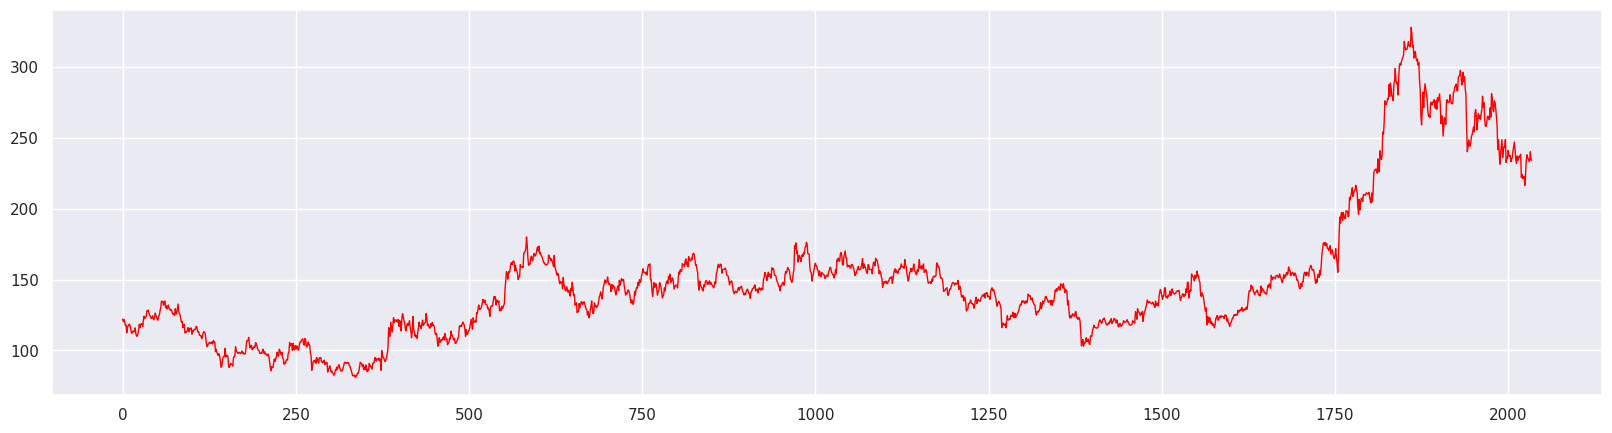

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
df['Open'].plot(linewidth=1,color='red')

<Axes: >

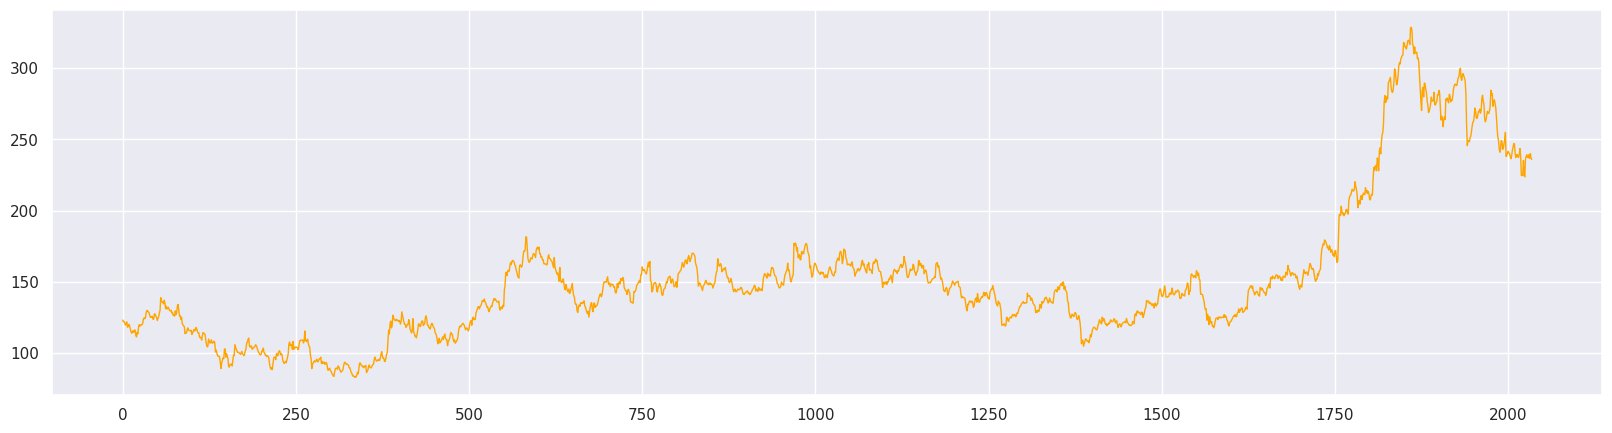

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
df['High'].plot(linewidth=1,color='orange')

<Axes: >

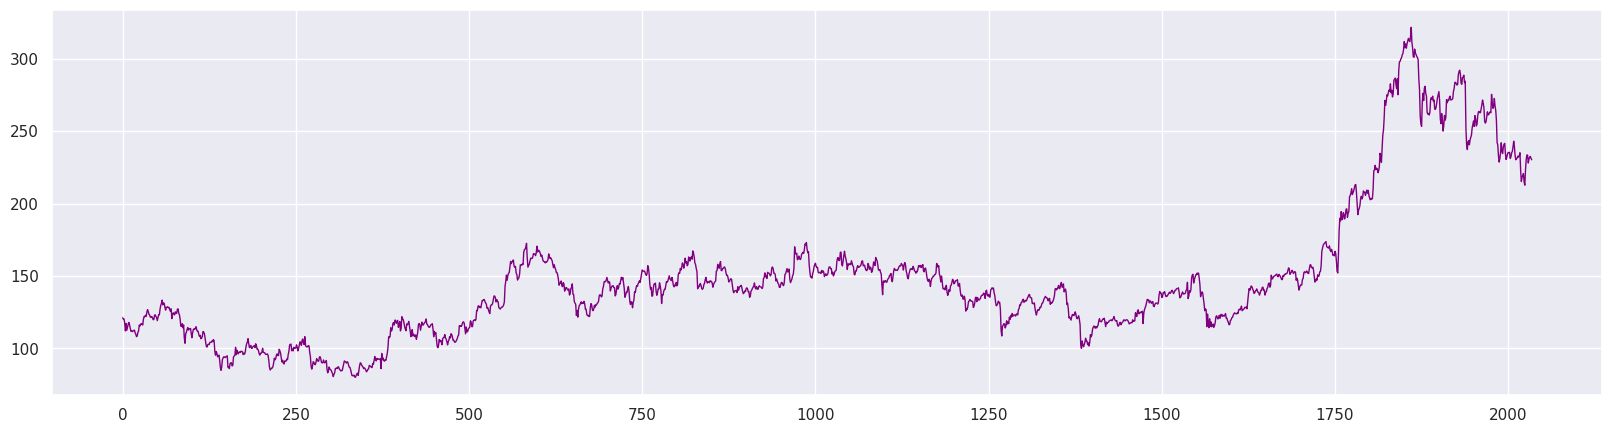

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
df['Low'].plot(linewidth=1,color='purple')

<Axes: >

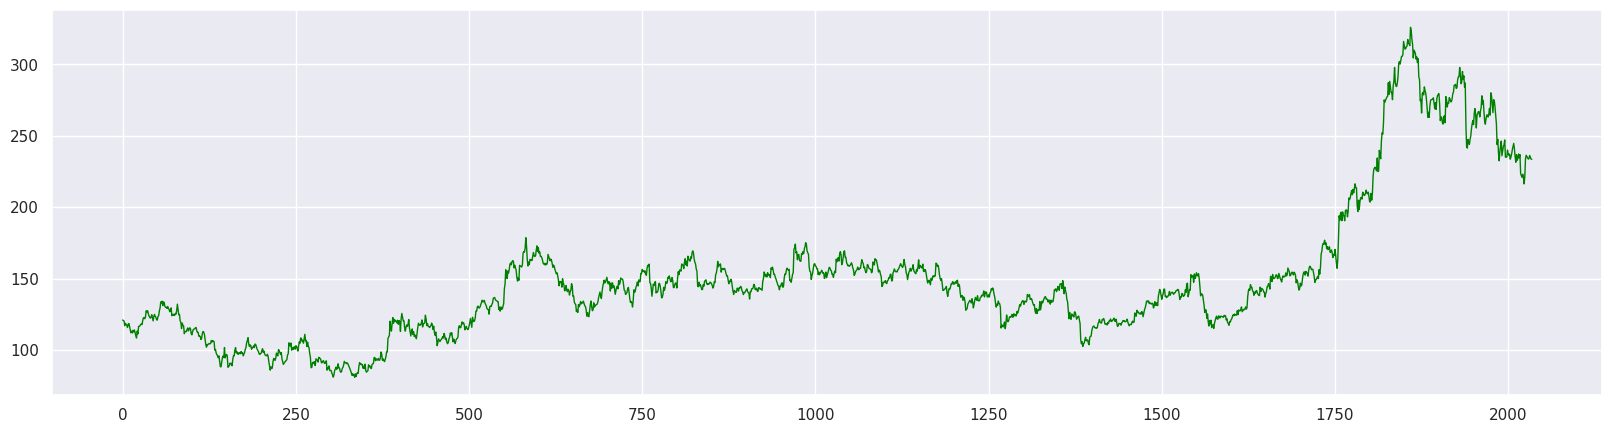

In [19]:
sns.set(rc={'figure.figsize':(20,5)})
df['Last'].plot(linewidth=1,color='green')

<Axes: >

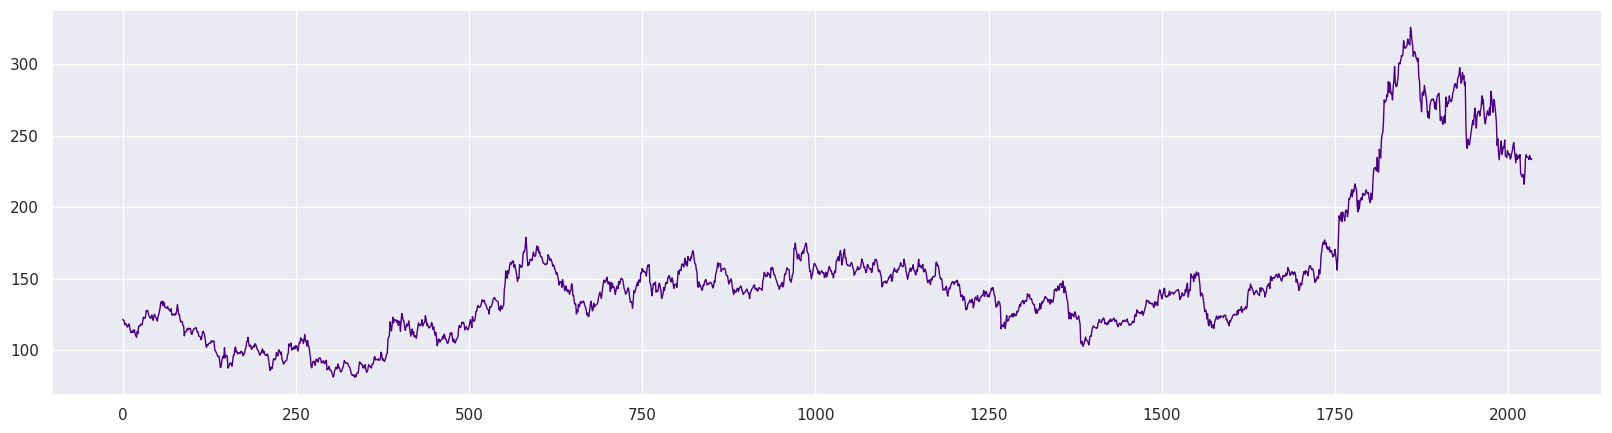

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
df['Close'].plot(linewidth=1,color='indigo')

<ipython-input-21-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

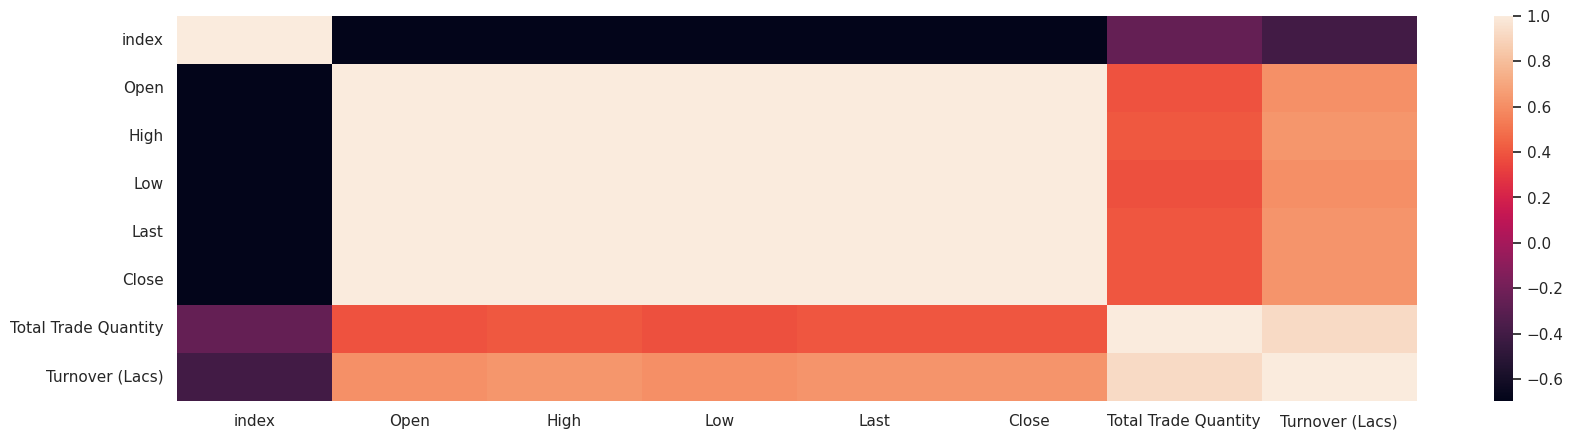

In [21]:
sns.heatmap(df.corr())

prepare data

In [22]:
df.rolling(7).mean().head(10)

<ipython-input-22-73361e2470bc>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(10)


,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2031.0,118.914286,121.378571,117.192857,119.107143,119.171429,8.103653e+05,965.581429
7,2030.0,118.114286,120.664286,116.271429,118.357143,118.385714,1.095726e+06,1295.455714
8,2029.0,117.685714,120.164286,115.750000,117.978571,117.871429,1.148623e+06,1356.124286
9,2028.0,117.185714,119.878571,115.414286,117.735714,117.535714,1.195755e+06,1411.334286


<Axes: >

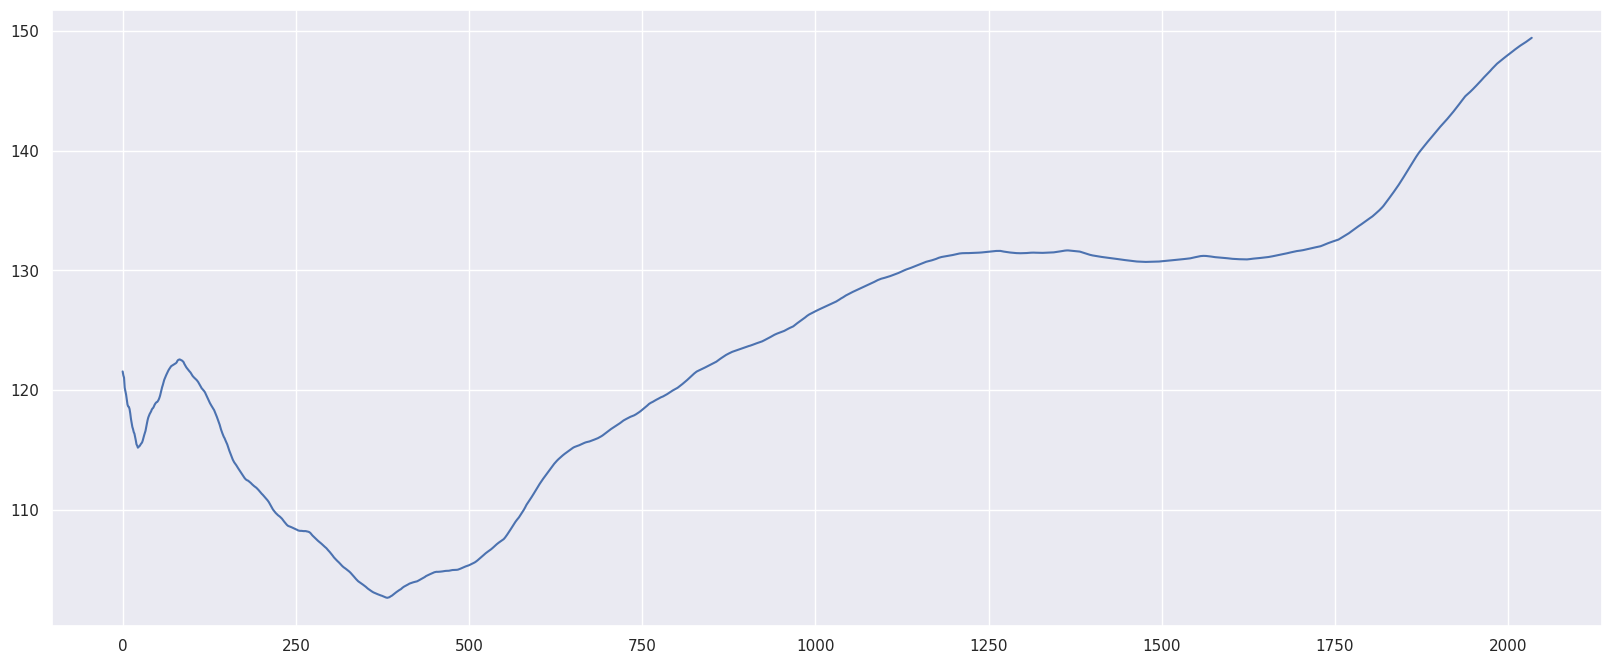

In [23]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha=1)

In [24]:
df1=df.reset_index()['Close']
df1.shape

(2035,)

In [25]:
df1[1228:]

1228    129.55
1229    132.20
1230    135.55
1231    137.10
1232    136.10
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 807, dtype: float64

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [27]:
df1.shape

(2035, 1)

In [28]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(1424, 611)

In [30]:
len(train_data),len(test_data)

(1424, 611)

In [31]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [32]:
time_step=100
x_train, y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data, time_step)

In [33]:
print(x_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [34]:
print(x_test.shape),print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [35]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

model building

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 12s 281ms/step - loss: 0.0100 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 5s 277ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/60
19/19 [==============================] - 4s 205ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 4s 225ms/step - loss: 8.4443e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 5s 283ms/step - loss: 8.3610e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 202ms/step - loss: 8.1089e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 6s 337ms/step - loss: 7.7613e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 218ms/step - loss: 7.4659e-04 - val_loss: 9.9541e-04
Epoch 9/60
19/19 [==============================] - 4s 222ms/step - loss: 7.2897e-04 - val_loss: 9.2876e-04
Epoch 10/60
19/19 [==============================] - 5s 260ms/step 

In [39]:
test_predict=model.predict(x_test)

16/16 [==============================] - 4s 76ms/step


In [40]:
test_predict=scaler.inverse_transform(test_predict)

In [42]:
train_predict=model.predict(x_train)

42/42 [==============================] - 4s 94ms/step


In [43]:
train_predict=scaler.inverse_transform(train_predict)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

206.1690671005985

In [47]:
math.sqrt(mean_squared_error(y_train,train_predict))

132.926439447732

In [45]:
import numpy

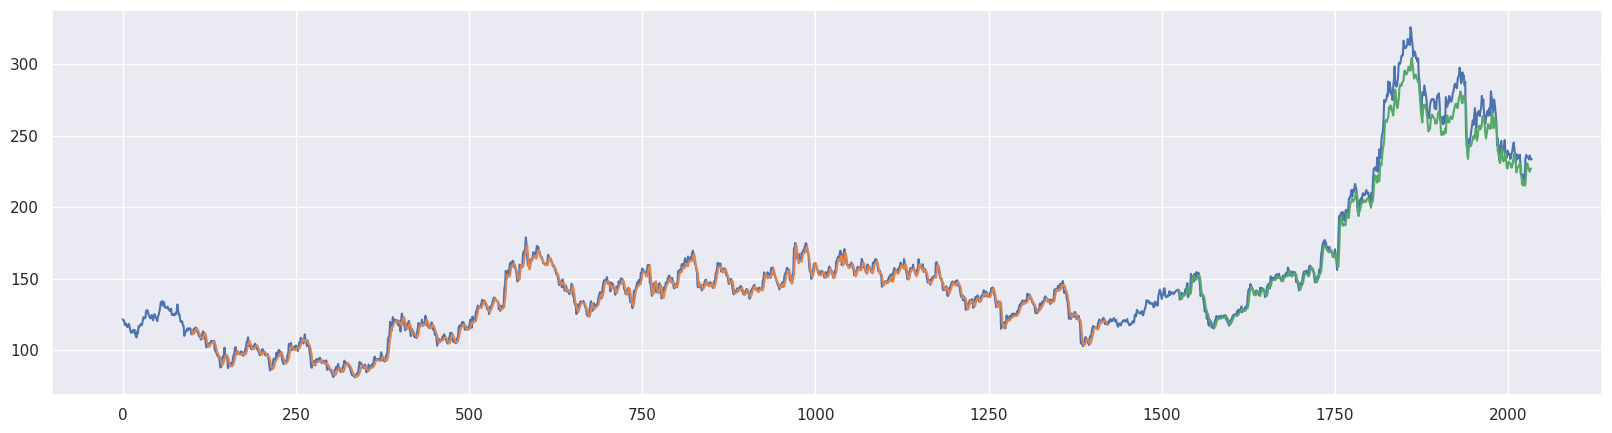

In [49]:
look_back=100
trainpredictplot=numpy.empty_like(df1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
testpredictplot=numpy.empty_like(df1)
testpredictplot[:, :]=numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

red data indicate traning data set and green indicate the test data 

In [50]:
len(test_data)

611

In [51]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [54]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5955097]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
import matplotlib.pyplot as plt

In [57]:
len(df1)

2035

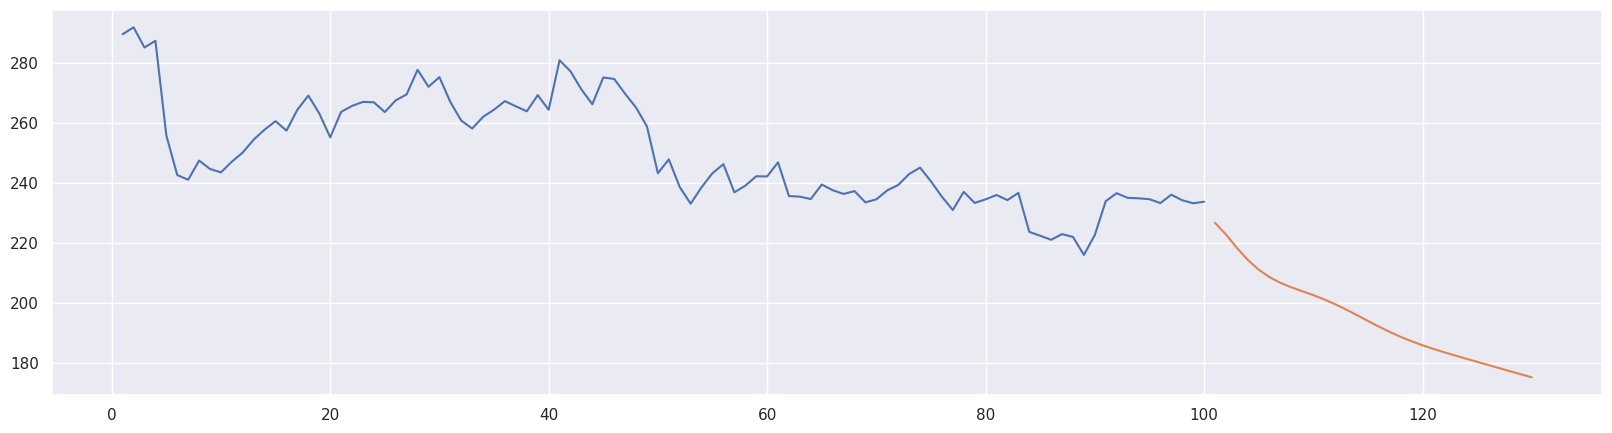

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

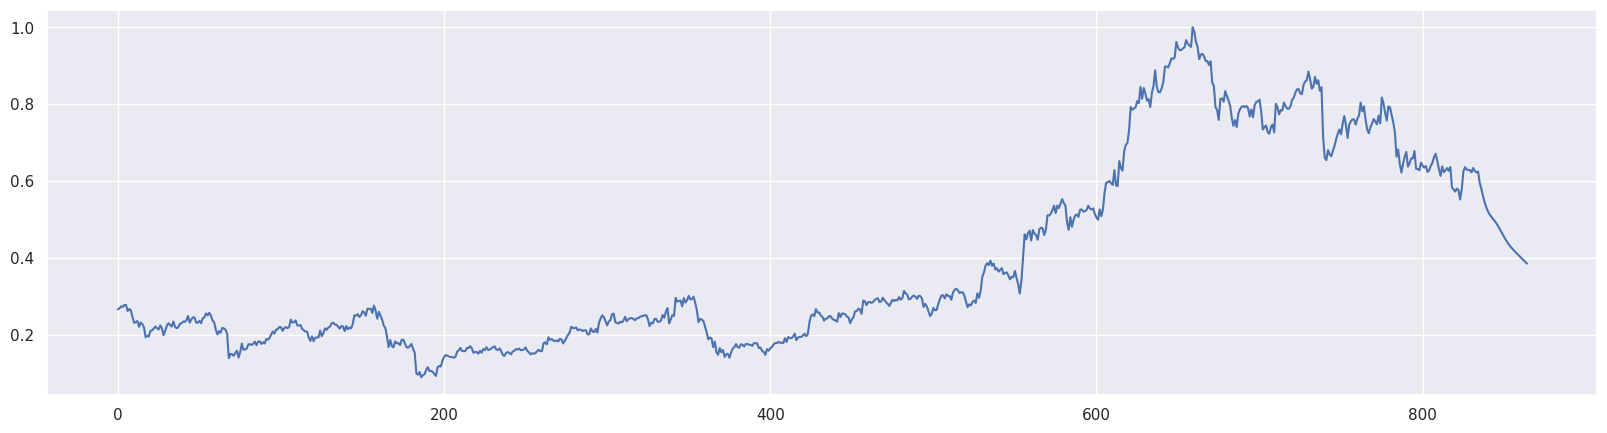

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [60]:
df3=scaler.inverse_transform(df3).tolist()

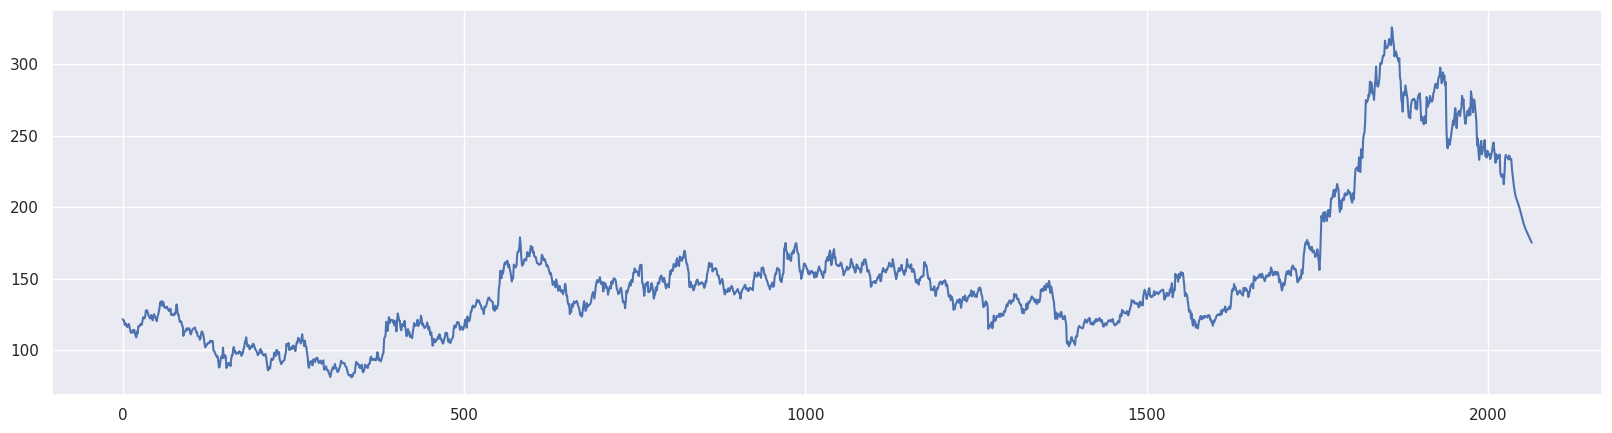

In [61]:
plt.plot(df3)